In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Загрузим данные
profile = pd.read_csv('profile.csv')

In [3]:
profile

,Unnamed: 0,gender,age,id,became_member_on,income
0,0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
...,...,...,...,...,...,...
16995,16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0
16996,16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0
16997,16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0
16998,16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0


In [4]:
# Преобразование колонки became_member_on в формат даты
profile['became_member_on'] = pd.to_datetime(profile['became_member_on'], format='%Y%m%d')

# Извлечение года, месяца и дня
profile['member_year'] = profile['became_member_on'].dt.year
profile['member_month'] = profile['became_member_on'].dt.month
profile['member_day'] = profile['became_member_on'].dt.day

# Проверка результатов
profile.head(50)


,Unnamed: 0,gender,age,id,became_member_on,income,member_year,member_month,member_day
0,0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN,2017,2,12
1,1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,2017,7,15
2,2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN,2018,7,12
3,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,2017,5,9
4,4,NaN,118,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN,2017,8,4
5,5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,2018,4,26
6,6,NaN,118,8ec6ce2a7e7949b1bf142def7d0e0586,2017-09-25,NaN,2017,9,25
7,7,NaN,118,68617ca6246f4fbc85e91a2a49552598,2017-10-02,NaN,2017,10,2
8,8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0,2018,2,9
9,9,NaN,118,8974fc5686fe429db53ddde067b88302,2016-11-22,NaN,2016,11,22


In [5]:
# Проверим наличие пропущенных значений
print(profile.isnull().sum())

Unnamed: 0             0
gender              2175
age                    0
id                     0
became_member_on       0
income              2175
member_year            0
member_month           0
member_day             0
dtype: int64


In [6]:
# Заполнение пропущенных значений в поле 'gender'
profile.loc[profile['gender'].isna(), 'gender'] = 'U'
profile['income'].fillna(profile['income'].mean(), inplace=True)

In [ ]:
profile.head(60)

,Unnamed: 0,gender,age,id,became_member_on,income,member_year,member_month,member_day
0,0,U,118,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,65404.991568,2017,2,12
1,1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.000000,2017,7,15
2,2,U,118,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,65404.991568,2018,7,12
3,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.000000,2017,5,9
4,4,U,118,a03223e636434f42ac4c3df47e8bac43,2017-08-04,65404.991568,2017,8,4
5,5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.000000,2018,4,26
6,6,U,118,8ec6ce2a7e7949b1bf142def7d0e0586,2017-09-25,65404.991568,2017,9,25
7,7,U,118,68617ca6246f4fbc85e91a2a49552598,2017-10-02,65404.991568,2017,10,2
8,8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.000000,2018,2,9
9,9,U,118,8974fc5686fe429db53ddde067b88302,2016-11-22,65404.991568,2016,11,22


In [7]:
profile['gender'] = profile['gender'].map({'F': 0, 'M': 1, 'U': 2, 'O': 3})

In [8]:
profile['gender'].value_counts()

gender
1    8484
0    6129
2    2175
3     212
Name: count, dtype: int64

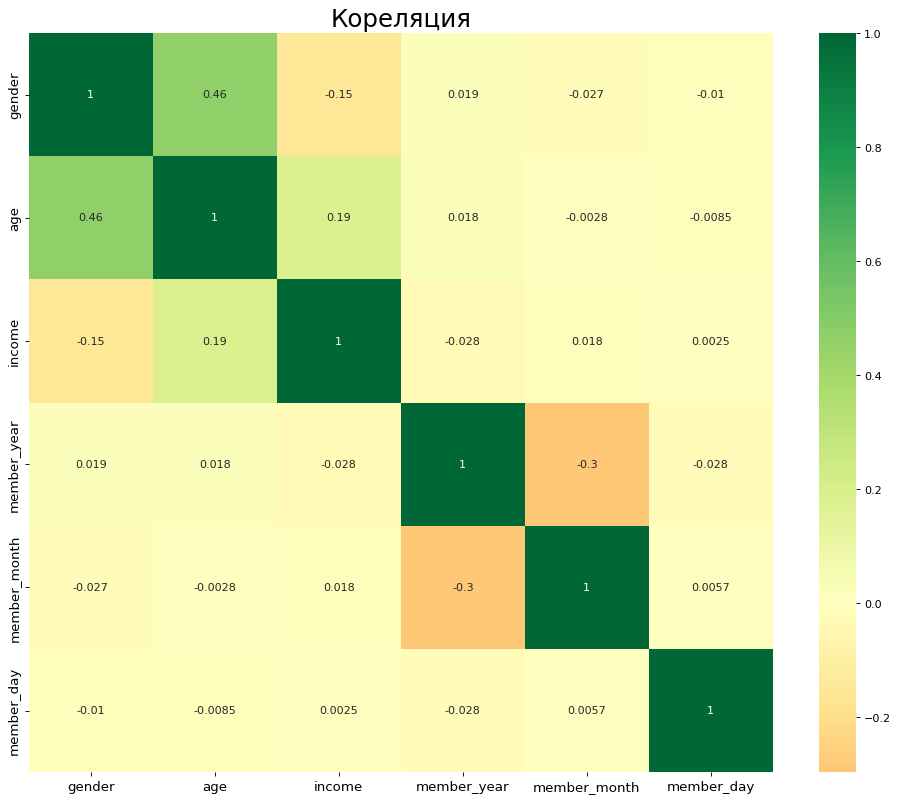

In [ ]:
profile.drop(columns=['Unnamed: 0'], inplace=True)
profile = profile.drop('became_member_on', axis=1)
profile = profile.drop('id', axis=1)

plt.figure(figsize=(15,12), dpi= 80)
sns.heatmap(profile.corr(), xticklabels=profile.corr().columns, yticklabels=profile.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Кореляция', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Text(0.5, 1.0, 'income')

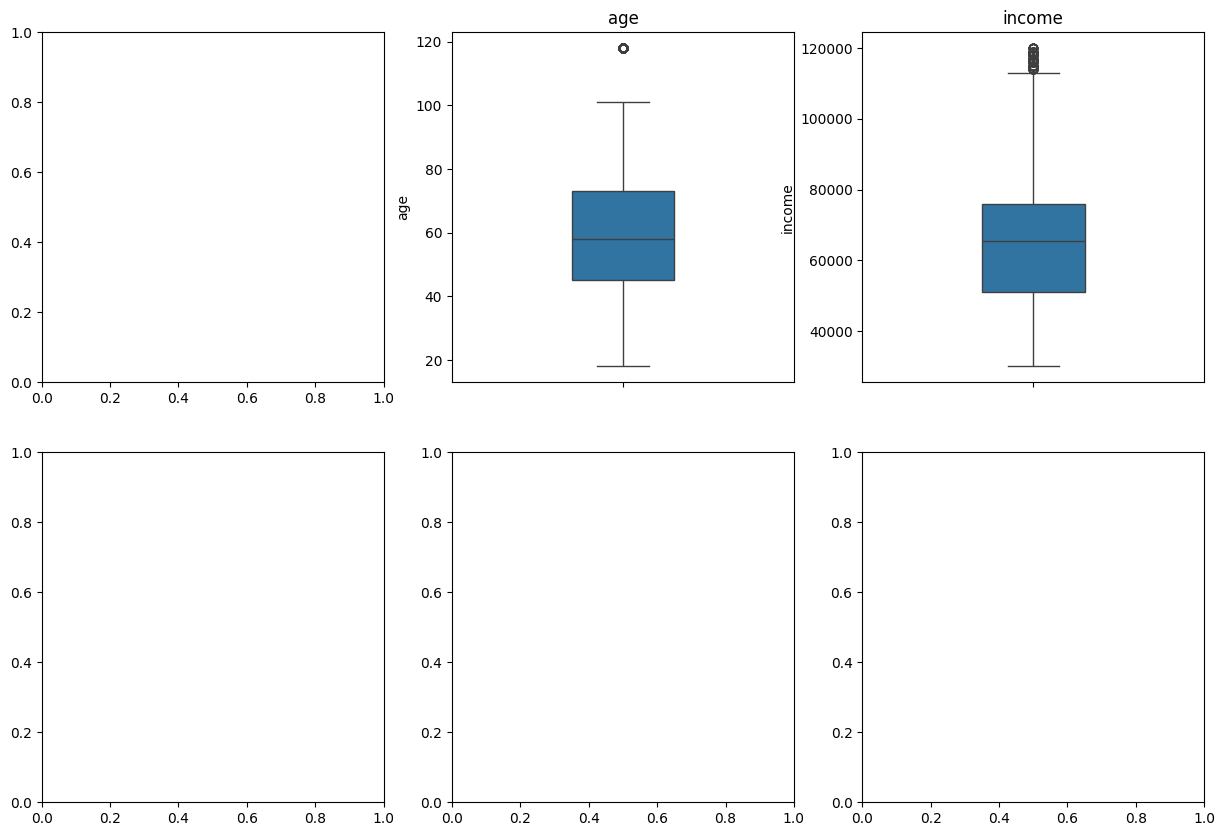

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15,10))

sns.boxplot(profile['age'], ax=axes[0][1], width=0.3).set_title('age')
sns.boxplot(profile['income'], ax=axes[0][2], width=0.3).set_title('income')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

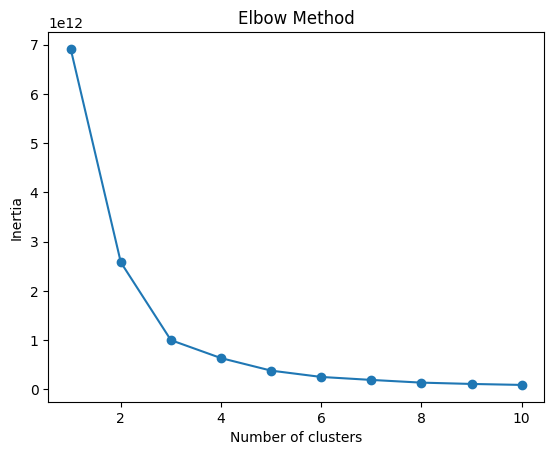

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Выбор оптимального числа кластеров методом локтя
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(profile)
    inertia.append(kmeans.inertia_)

# Визуализация метода локтя
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [ ]:
from sklearn.cluster import KMeans

X = profile
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
Y_pred = kmeans.labels_
Y_pred = kmeans.predict(X)
print(Y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2 3 2 ... 2 4 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.5498816488061575


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.6016495325514544


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.5593408426198916


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.5838317934573553


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.5953803490378904


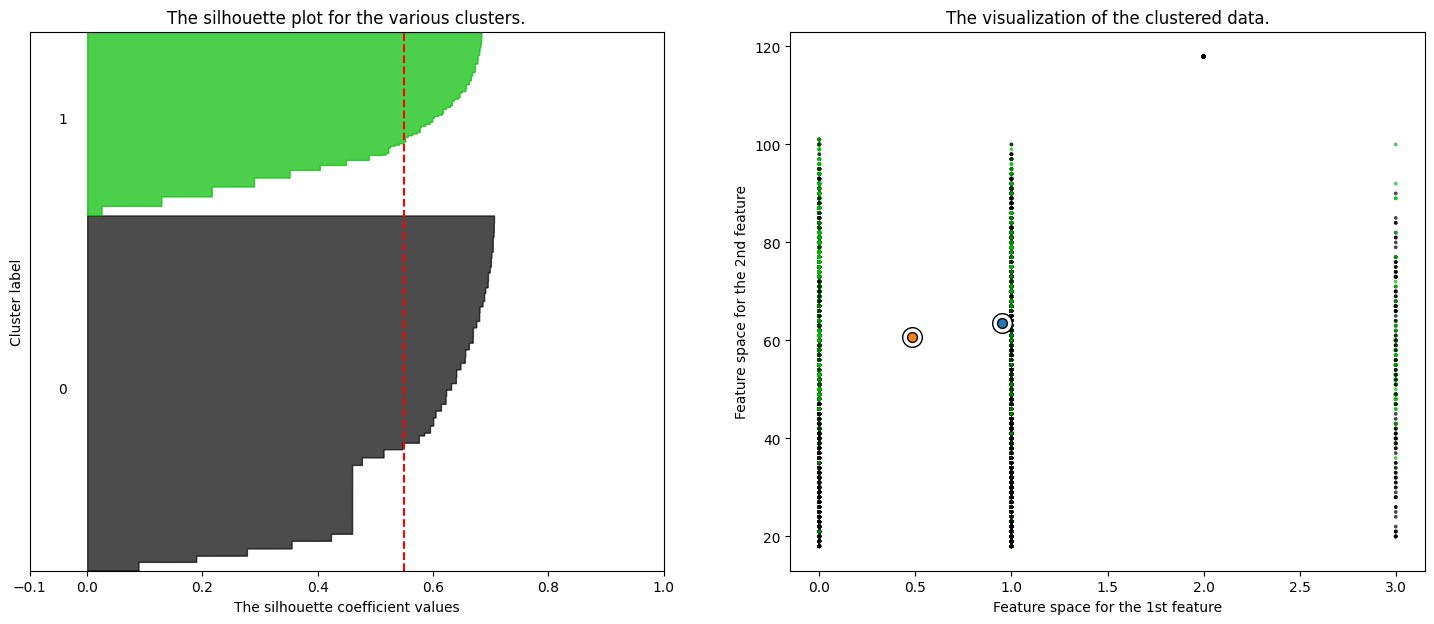

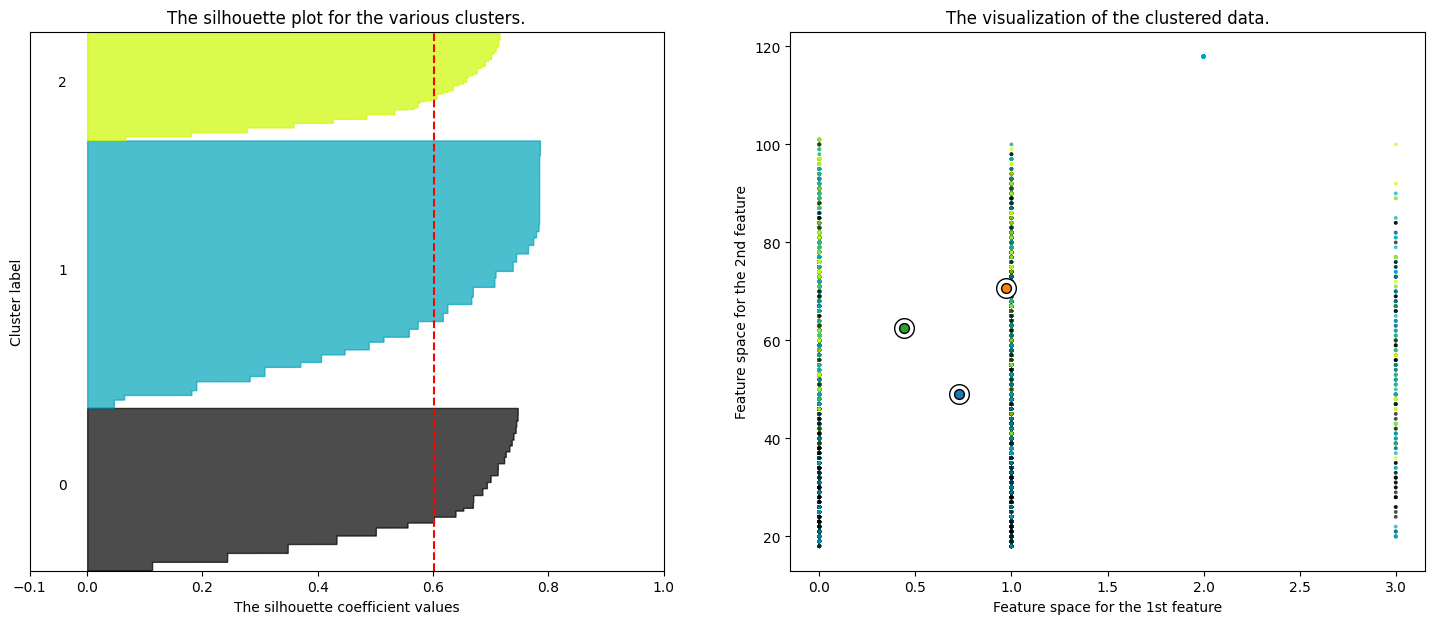

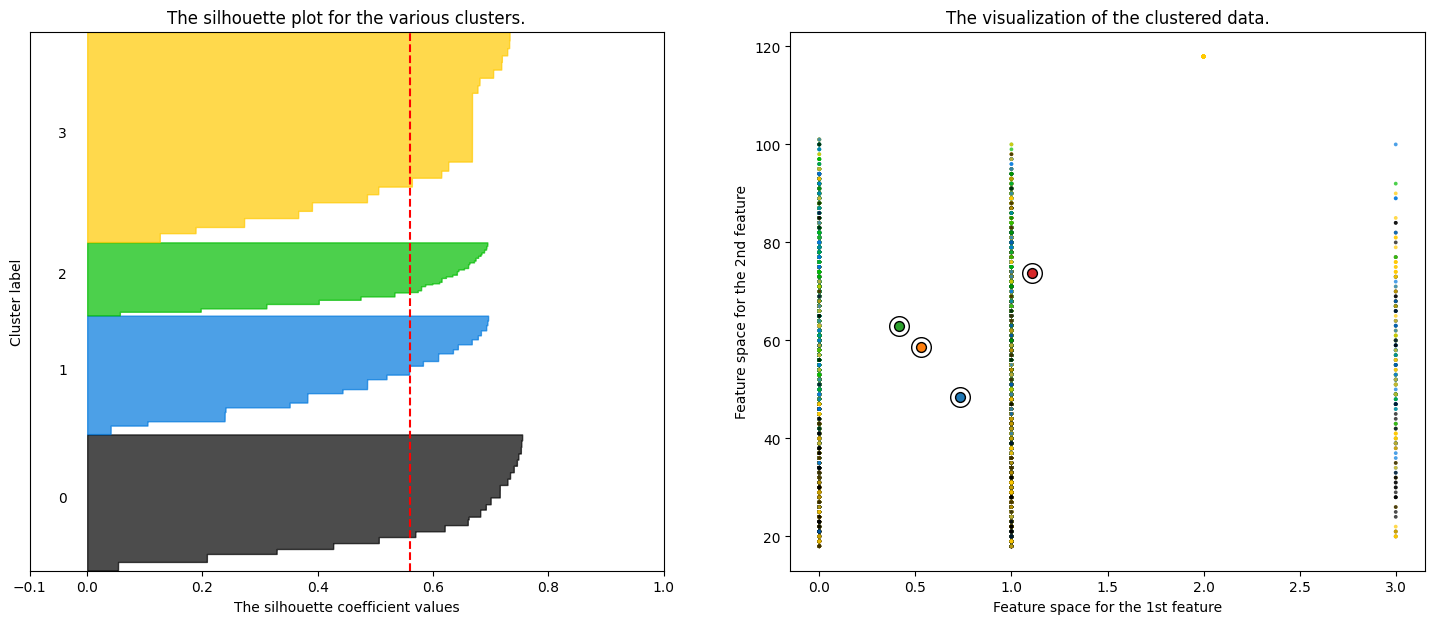

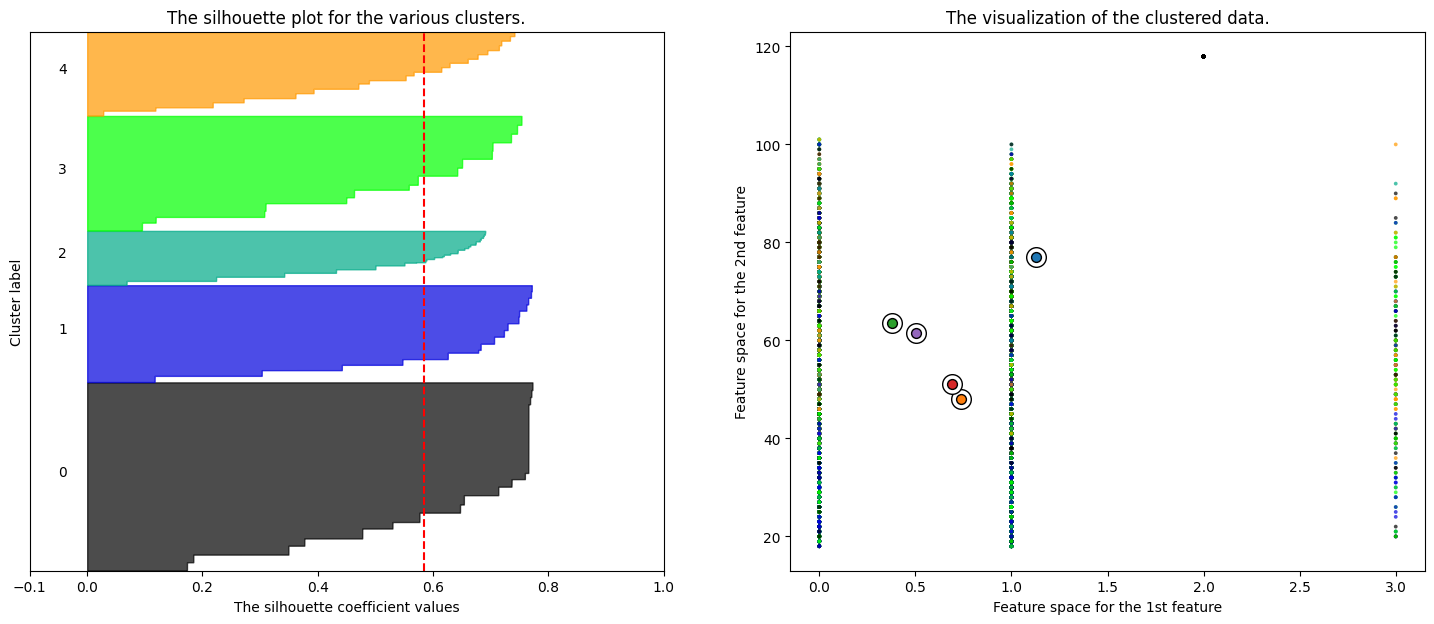

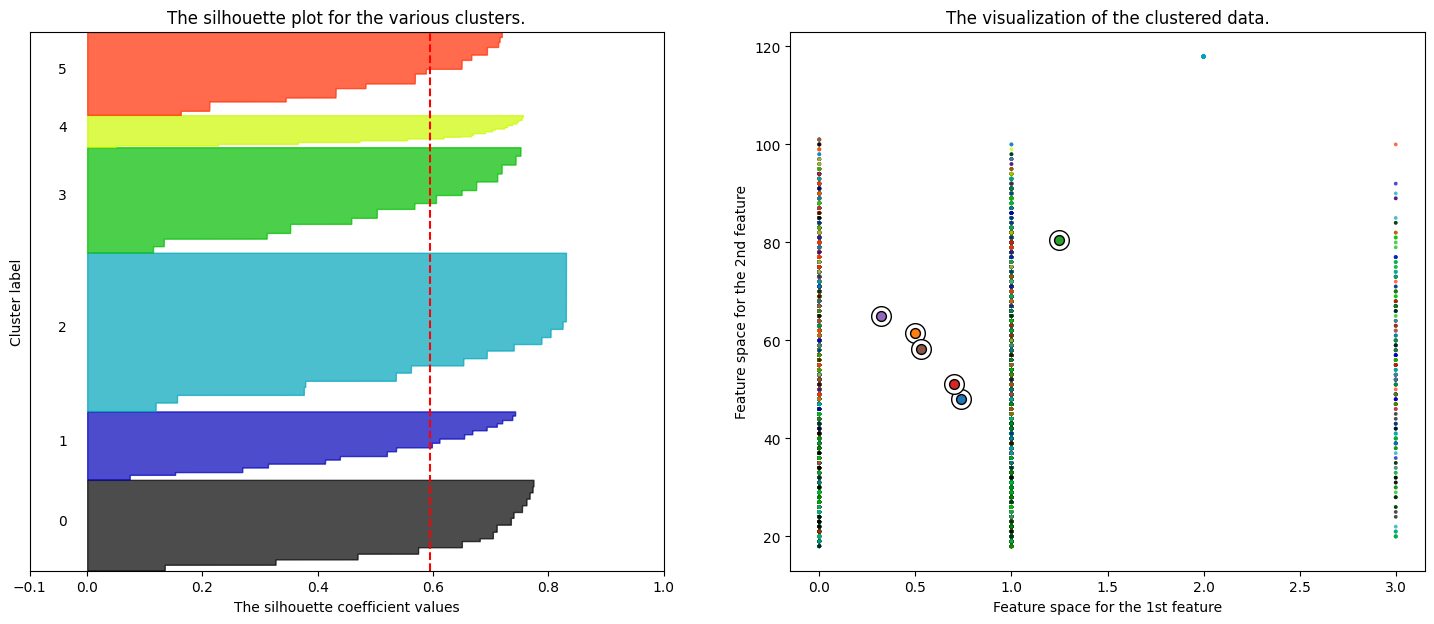

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np

range_n_clusters = range(2, min(7, len(X)))

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X.values[:, 0], X.values[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    centers = clusterer.cluster_centers_

    ax2.scatter(
        centers[:, 0], centers[:, 1], marker="o", c="white", alpha=1, s=200, edgecolor="k"
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="o", alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

plt.show()


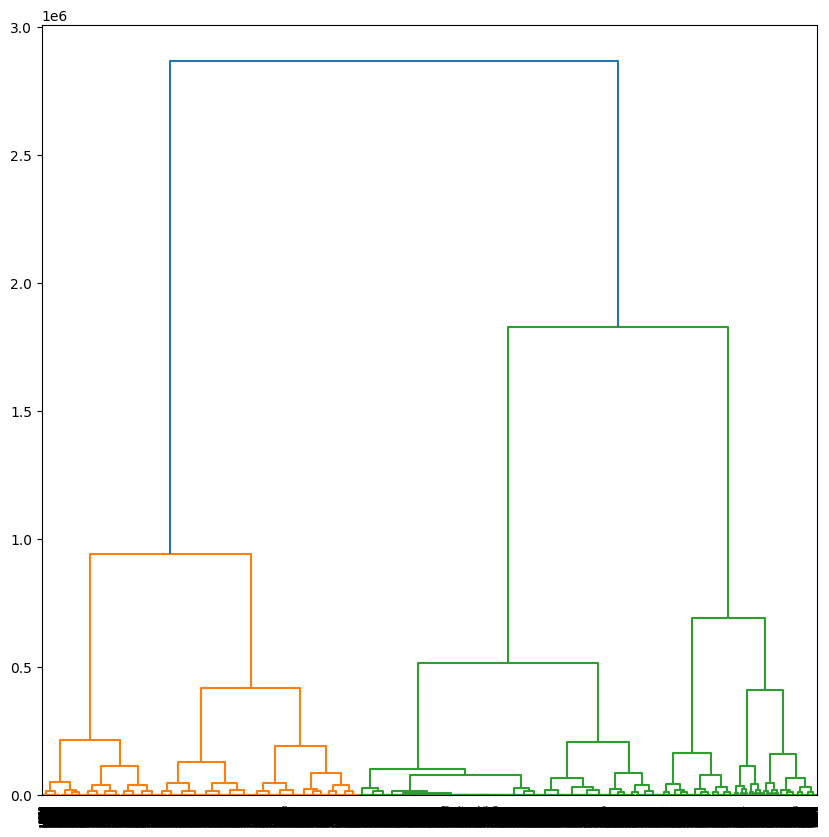

In [ ]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

Z = linkage(X, 'ward')

# Визуализация дендрограммы
fig = plt.figure(figsize=(10, 10))
dn = dendrogram(Z)

# Отображение графика
plt.show()

In [ ]:
profile

,gender,age,income,member_year,member_month,member_day
0,2,118,65404.991568,2017,2,12
1,0,55,112000.000000,2017,7,15
2,2,118,65404.991568,2018,7,12
3,0,75,100000.000000,2017,5,9
4,2,118,65404.991568,2017,8,4
...,...,...,...,...,...,...
16995,0,45,54000.000000,2018,6,4
16996,1,61,72000.000000,2018,7,13
16997,1,49,73000.000000,2017,1,26
16998,0,83,50000.000000,2016,3,7


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


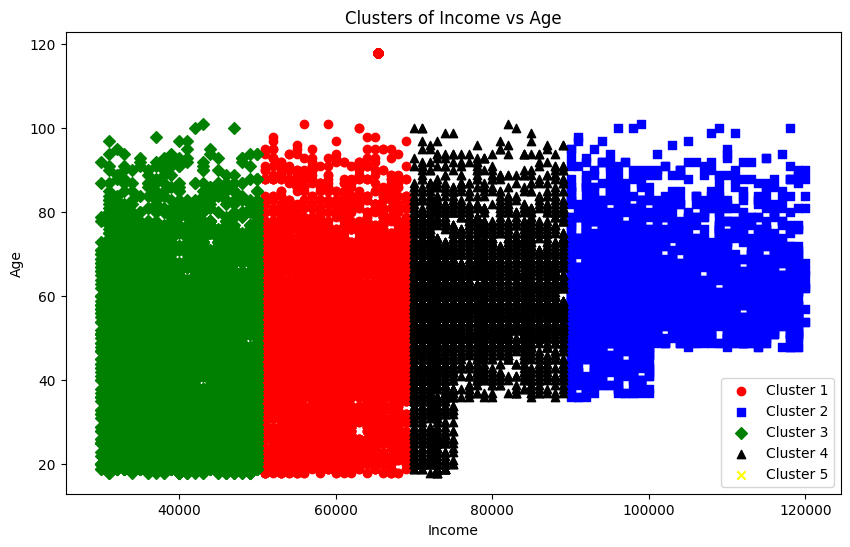

In [ ]:
X = profile[['age', 'member_year', 'member_month', 'member_day', 'gender', 'income']]

# Создадим модель KMeans и выполним кластеризацию
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# Получим метки кластеров для каждого примера
cluster_labels = kmeans.labels_

# Добавим метки кластеров к исходным данным
profile['cluster'] = cluster_labels

# Визуализируем кластеры (используем 'age' и 'member_year' для осей)
colors = ['red', 'blue', 'green', 'black', 'yellow']
markers = ['o', 's', 'D', '^', 'x']

plt.figure(figsize=(10, 6))

for i in range(5):
    cluster_profile = profile[profile['cluster'] == i]
    plt.scatter(cluster_profile['income'], cluster_profile['age'], color=colors[i], marker=markers[i], label=f'Cluster {i+1}')

plt.xlabel('Income')
plt.ylabel('Age')
plt.title('Clusters of Income vs Age')
plt.legend()
plt.show()